In [109]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt


## Dummy Data

In [90]:
n_events = 1000
n_samples = 10000

In [91]:
# Simulate dummy propensity data using beta distribution
# Alpha and beta are varied to create diversity in propensities
alpha = np.random.uniform(1, 5, n_events)
beta = np.random.uniform(1, 5, n_events)
propensity_samples = [np.random.beta(a, b, n_samples) for a, b in zip(alpha, beta)]

mean_propensity = [samples.mean() for samples in propensity_samples]
lower_95_ci = [np.percentile(samples, 2.5) for samples in propensity_samples]
upper_95_ci = [np.percentile(samples, 97.5) for samples in propensity_samples]

actual_outcomes = np.random.binomial(1, mean_propensity)
odds = df['Odds'] = df['Mean_Propensity'] + np.random.uniform(-0.1, 0.05, size=n_events)

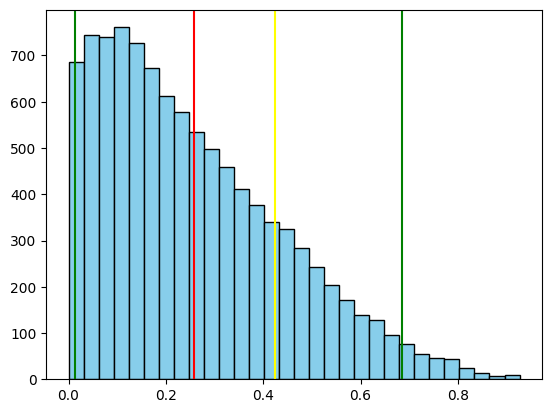

In [92]:
viz_num = 0

plt.hist(propensity_samples[viz_num], bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_propensity[viz_num], color='red')
plt.axvline(lower_95_ci[viz_num], color='green')
plt.axvline(upper_95_ci[viz_num], color='green')
plt.axvline(odds[viz_num], color='yellow')

In [103]:
df = pd.DataFrame({
    'Event_ID': range(1, n_events + 1),
    'Mean_Propensity': mean_propensity,
    'Lower_95_CI': lower_95_ci,
    'Upper_95_CI': upper_95_ci,
    'Actual_Outcome': actual_outcomes,
    'Odds_prob': odds,
    'Odds': odds/(1-odds),

})
df['Lower_95_CI_Bin'] = pd.qcut(df['Lower_95_CI'], q=10)
df['Mean_Propensity_Bin'] = pd.qcut(df['Mean_Propensity'], q=10)



## Evaluating the model

/var/folders/v9/kb3jvzkj60v_67dzgnm9_n_80000gn/T/ipykernel_70004/4154900974.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Lower_95_CI_Bin'])['Actual_Outcome'].mean()


<Axes: xlabel='Lower_95_CI_Bin'>

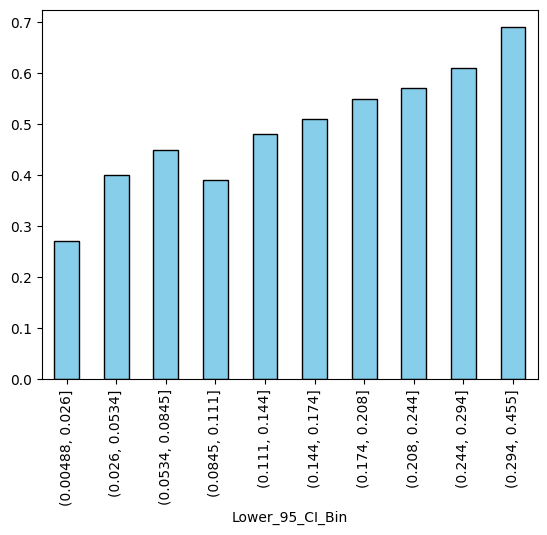

In [120]:
grouped_data = df.groupby(['Lower_95_CI_Bin'])['Actual_Outcome'].mean()
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')

## Stratergy 

In [112]:
df['Bet_Indicator'] = np.where(df['Odds_prob'] < df['Lower_95_CI'], 1, 0)

df['Bet_Outcome'] = np.where((df['Bet_Indicator'] == 1) & (df['Actual_Outcome'] == 1), 1,      
                   np.where((df['Bet_Indicator'] == 1) & (df['Actual_Outcome'] == 0), -1,    
                   0))  



df['Bet_Profit'] = np.where((df['Bet_Indicator'] == 1) & (df['Actual_Outcome'] == 1), df['Odds'] + 1,      
                   np.where((df['Bet_Indicator'] == 1) & (df['Actual_Outcome'] == 0), -1,    
                   0)) 

In [118]:
placed = df['Bet_Indicator'].sum()
won = len(df[df['Bet_Outcome'] == 1])
lost = len(df[df['Bet_Outcome'] == -1])
profit = df['Bet_Outcome'].sum()
return_percentage = ((profit+placed)/placed) - 1  

print(f'Total Bets placed: {placed}')
print(f'Total Bets won: {won}')
print(f'Total Bets lost: {lost}')
print(f'Total Win Profit: {profit}')
print(f'Return Profit: {round(100*return_percentage, 2)}%')

Total Bets placed: 40
Total Bets won: 30
Total Bets lost: 10
Total Win Profit: 20
Return Profit: 50.0%
